In [59]:
#The purpose of this notebook is to take in the paper_ligand_results and determine how many ligands we would have potentially noticed if we did discovery with them
#We'll note if we would have kept the ligand if the intera tion count is >5 and either the ddg in the top 10 percentile with a real motif ratio of at least 0.25 or the real motif ratio was at least 0.5

#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [60]:
"""
Key for authors to match up with paper names
Gryniukova et al - AI-powered_Virtual_Screening_of_Large_Compound_Libraries_leads_to_the_Discovery_of_Novel_Inhibitors_of_Sirtuin-1
Zhou et al - An_artificial_intelligence_accelerated_virtual_screening_platform_for_drug_discovery
MAYBE BAD Beroza et al - Chemical_space_docking_enables_large-scale_structure-based_virtual_screening_to_discover_ROCK1_kinase_inhibitors
Singh, Fengling et al - Conformer_Params_files_for_Structure-Based_Discovery_of_Inhibitors_of_the_SARS-CoV-2_Nsp14_N7-Methyltransferase
Gahbauer et al - Docking_for_EP4R_antagonists_active_against_inflammatory_pain
Bender et al - Structure-Based_Discovery_of_a_NPFF1R_Antagonist_with_Analgesic_Activity
INCOMPLETE Liu et al - Structure-based_discovery_of_CFTR_potentiators_and_inhibitors
Singh, Seth et al - Structure-based_discovery_of_conformationally_selective_inhibitors_of_the_serotonin_transporter
Manglik et al - Structure-based_discovery_of_opioid_analgesics_with_reduced_side_effects
Alon et al - Structures_of_the_sigma2_receptor_enable_docking_for_bioactive_ligand_discovery
MAYBE BAD Sadybekov et al et al - Synthon-based_ligand_discovery_in_virtual_libraries_of_over_11_billion_compounds
INCOMPLETE Lyu et al - Ultra-large_library_docking_for_discovering_new_chemotypes
INCOMPLETE Stein et al - Virtual_discovery_of_melatonin_receptor_ligands_to_modulate_circadian_rhythms
"""

'\nKey for authors to match up with paper names\nGryniukova et al - AI-powered_Virtual_Screening_of_Large_Compound_Libraries_leads_to_the_Discovery_of_Novel_Inhibitors_of_Sirtuin-1\nZhou et al - An_artificial_intelligence_accelerated_virtual_screening_platform_for_drug_discovery\nMAYBE BAD Beroza et al - Chemical_space_docking_enables_large-scale_structure-based_virtual_screening_to_discover_ROCK1_kinase_inhibitors\nSingh, Fengling et al - Conformer_Params_files_for_Structure-Based_Discovery_of_Inhibitors_of_the_SARS-CoV-2_Nsp14_N7-Methyltransferase\nGahbauer et al - Docking_for_EP4R_antagonists_active_against_inflammatory_pain\nBender et al - Structure-Based_Discovery_of_a_NPFF1R_Antagonist_with_Analgesic_Activity\nINCOMPLETE Liu et al - Structure-based_discovery_of_CFTR_potentiators_and_inhibitors\nSingh, Seth et al - Structure-based_discovery_of_conformationally_selective_inhibitors_of_the_serotonin_transporter\nManglik et al - Structure-based_discovery_of_opioid_analgesics_with_red

In [61]:
#create main dataframe that will hold counts for how the ligands fared
#The data will be boiled down to a yes or no as to whether we would have noticed the ligands

# Example publication names (unique identifiers)
#full list
#publication_names = ["Gryniukova et al", "Zhou et al", "Beroza et al", "Singh, Fengling et al", "Gahbauer et al", "Bender et al", "Liu et al", "Singh, Seth et al", "Manglik et al", "Alon et al", "Sadybekov et al", "Lyu et al", "Stein et al"]


publication_names = ["Gryniukova et al", "Zhou et al", "Singh, Fengling et al", "Gahbauer et al", "Bender et al", "Manglik et al", "Singh, Seth et al", "Alon et al"]

# Initialize the DataFrame with default values (e.g., zeros for integer values)
main_df = pd.DataFrame({
    "found": [0] * len(publication_names),      # Set initial integer values
    "not_found": [0] * len(publication_names)
}, index=publication_names)                     # Use publication names as row names

print(main_df)

                       found  not_found
Gryniukova et al           0          0
Zhou et al                 0          0
Singh, Fengling et al      0          0
Gahbauer et al             0          0
Bender et al               0          0
Manglik et al              0          0
Singh, Seth et al          0          0
Alon et al                 0          0


In [62]:
#read in paper data
#read in the data csv
#AI powered
#Gryniukova et al
df = pd.read_csv("../../../benchmarking_other_papers/papers/AI-powered_Virtual_Screening_of_Large_Compound_Libraries_leads_to_the_Discovery_of_Novel_Inhibitors_of_Sirtuin-1/analysis_results/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Gryniukova et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Gryniukova et al", "not_found"] = main_df.loc["Gryniukova et al", "not_found"] - 1
        main_df.loc["Gryniukova et al", "found"] = main_df.loc["Gryniukova et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z31269192
We would identify ligand Z26395449
We would identify ligand Z240678214
We would identify ligand Z26395518
We would identify ligand Z254577874
We would identify ligand Z32440384
We would identify ligand Z26395441
We would identify ligand Z26395442
We would identify ligand Z26395438


In [63]:
#read in paper data
#read in the data csv
#Synthon
#Sadybekov et al
#this failed to get any actual placements, goign to hard code to all ligands fail
#skipping for now to see if we can actually figure this out, something is probably still broken with 2etr
#main_df.loc["Sadybekov et al", "not_found"] = 7
"""
df = pd.read_csv("../../../benchmarking_other_papers/papers/Synthon-based_ligand_discovery_in_virtual_libraries_of_over_11_billion_compounds/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = 7

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Sadybekov et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Sadybekov et al", "not_found"] = main_df.loc["Sadybekov et al", "not_found"] - 1
        main_df.loc["Sadybekov et al", "found"] = main_df.loc["Sadybekov et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])
"""

'\ndf = pd.read_csv("../../../benchmarking_other_papers/papers/Synthon-based_ligand_discovery_in_virtual_libraries_of_over_11_billion_compounds/analysis_space/paper_ligands_rank.csv")\n\n#number of ligands in the paper that we tried to work with\nnum_ligands = 7\n\n#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found\nmain_df.loc["Sadybekov et al", "not_found"] = num_ligands\n\n#run through each ligand from the paper and determine if we would have kept it\n# Iterate through each row\nfor index, row in df.iterrows():\n    #print(f"Found: {row[\'found\']}, Not Found: {row[\'not_found\']}")\n    lig_found = False\n    if row[\'best_interaction\'] >= 6:\n        if (row[\'ddg_percentile\'] <= 0.1 and row[\'best_real_motif_ratio\'] >= 0.25) or row[\'best_real_motif_ratio\'] >= 0.5:\n            lig_found = True\n            \n    if lig_found:\n        print("We would identify ligand " + row[\'liga

In [64]:
#read in paper data
#read in the data csv
#an_artificial
#Zhou et al
df = pd.read_csv("../../../benchmarking_other_papers/papers/An_artificial_intelligence_accelerated_virtual_screening_platform_for_drug_discovery/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Zhou et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Zhou et al", "not_found"] = main_df.loc["Zhou et al", "not_found"] - 1
        main_df.loc["Zhou et al", "found"] = main_df.loc["Zhou et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z8739902234
We would identify ligand Z8739902231
We would identify ligand Z4315497494
We would identify ligand Z8718594710
We would identify ligand Z8718594701
We would identify ligand Z8718594704
We would identify ligand Z3831472882
We would identify ligand Z4415557415
We would identify ligand Z8739905023


In [65]:
#read in paper data
#read in the data csv
#rock1
#Beroza et al - Chemical_space_docking_enables_large-scale_structure-based_virtual_screening_to_discover_ROCK1_kinase_inhibitors
#this failed to get any actual placements, goign to hard code to zero

#skipping for now to see if we can actually figure this out, something is probably still broken with 2etr
#main_df.loc["Beroza et al", "not_found"] = 27

"""
df = pd.read_csv("../../../benchmarking_other_papers/papers/An_artificial_intelligence_accelerated_virtual_screening_platform_for_drug_discovery/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = 9

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Zhou et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Zhou et al", "not_found"] = main_df.loc["Zhou et al", "not_found"] - 1
        main_df.loc["Zhou et al", "found"] = main_df.loc["Zhou et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])
"""

'\ndf = pd.read_csv("../../../benchmarking_other_papers/papers/An_artificial_intelligence_accelerated_virtual_screening_platform_for_drug_discovery/analysis_space/paper_ligands_rank.csv")\n\n#number of ligands in the paper that we tried to work with\nnum_ligands = 9\n\n#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found\nmain_df.loc["Zhou et al", "not_found"] = num_ligands\n\n#run through each ligand from the paper and determine if we would have kept it\n# Iterate through each row\nfor index, row in df.iterrows():\n    #print(f"Found: {row[\'found\']}, Not Found: {row[\'not_found\']}")\n    lig_found = False\n    if row[\'best_interaction\'] >= 6:\n        if (row[\'ddg_percentile\'] <= 0.1 and row[\'best_real_motif_ratio\'] >= 0.25) or row[\'best_real_motif_ratio\'] >= 0.5:\n            lig_found = True\n            \n    if lig_found:\n        print("We would identify ligand " + row[\'ligan

In [66]:
#read in paper data
#read in the data csv
#covid 5c0s
#Singh, Fengling et al - Conformer_Params_files_for_Structure-Based_Discovery_of_Inhibitors_of_the_SARS-CoV-2_Nsp14_N7-Methyltransferase
df = pd.read_csv("../../../benchmarking_other_papers/papers/Conformer_Params_files_for_Structure-Based_Discovery_of_Inhibitors_of_the_SARS-CoV-2_Nsp14_N7-Methyltransferase/5c8s/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Singh, Fengling et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Singh, Fengling et al", "not_found"] = main_df.loc["Singh, Fengling et al", "not_found"] - 1
        main_df.loc["Singh, Fengling et al", "found"] = main_df.loc["Singh, Fengling et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z5185631911
We would identify ligand Z1907784975
We would identify ligand Z2732986066
We would identify ligand Z5185631889
We would identify ligand Z5348530741
We would identify ligand Z5348530683
We would identify ligand Z4324535763
We would identify ligand Z3343635604
We would identify ligand Z5348530222
We would not identify ligand Z5348530626


In [67]:
df

,ligand,best_ddg,ddg_rank,ddg_percentile,best_interaction,interaction_rank,interaction_percentile,best_real_motif_count,real_motif_count_rank,real_motif_count_percentile,best_real_motif_ratio,real_motif_ratio_rank,real_motif_ratio_percentile,Unnamed: 13
0,Z5185631911,-18.333404,385,0.040293,11.0,212,0.022187,5.0,109,0.011408,1.000000,1,0.000105,NaN
1,Z1907784975,-17.841023,571,0.059759,12.0,12,0.001256,5.0,109,0.011408,1.000000,1,0.000105,NaN
2,Z2732986066,-16.159082,1784,0.186709,10.0,1660,0.173731,5.0,109,0.011408,1.000000,1,0.000105,NaN
3,Z5185631889,-15.807630,2143,0.224280,11.0,212,0.022187,5.0,109,0.011408,1.000000,1,0.000105,NaN
4,Z5348530741,-14.321515,4075,0.426478,9.0,4542,0.475353,4.0,869,0.090947,1.000000,1,0.000105,NaN
5,Z5348530683,-14.115567,4372,0.457561,8.0,6939,0.726217,6.0,10,0.001047,1.000000,1,0.000105,NaN
6,Z4324535763,-14.044596,4476,0.468446,10.0,1660,0.173731,4.0,869,0.090947,0.800000,2362,0.247200,NaN
7,Z3343635604,-13.995390,4541,0.475249,10.0,1660,0.173731,3.0,3201,0.335008,0.666667,3970,0.415489,NaN
8,Z5348530222,-12.318581,6900,0.722135,9.0,4542,0.475353,3.0,3201,0.335008,0.666667,3970,0.415489,NaN
9,Z5348530626,-11.092836,8303,0.868969,8.0,6939,0.726217,2.0,6380,0.667713,0.400000,7722,0.808163,NaN


In [68]:
#read in paper data
#read in the data csv

#Gahbauer et al - Docking_for_EP4R_antagonists_active_against_inflammatory_pain
df = pd.read_csv("../../../benchmarking_other_papers/papers/Docking_for_EP4R_antagonists_active_against_inflammatory_pain/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Gahbauer et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Gahbauer et al", "not_found"] = main_df.loc["Gahbauer et al", "not_found"] - 1
        main_df.loc["Gahbauer et al", "found"] = main_df.loc["Gahbauer et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z4647716479
We would identify ligand Z4647716459
We would identify ligand Z4875089799
We would identify ligand Z4361714899
We would identify ligand Z4361714947


In [69]:
#read in paper data
#read in the data csv

#Bender et al - Structure-Based_Discovery_of_a_NPFF1R_Antagonist_with_Analgesic_Activity
df = pd.read_csv("../../../benchmarking_other_papers/papers/Structure-Based_Discovery_of_a_NPFF1R_Antagonist_with_Analgesic_Activity/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Bender et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Bender et al", "not_found"] = main_df.loc["Bender et al", "not_found"] - 1
        main_df.loc["Bender et al", "found"] = main_df.loc["Bender et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z5075636300
We would not identify ligand ZINC000725343470


In [70]:
#read in paper data
#read in the data csv

#Manglik et al - Structure-based_discovery_of_opioid_analgesics_with_reduced_side_effects
df = pd.read_csv("../../../benchmarking_other_papers/papers/Structure-based_discovery_of_opioid_analgesics_with_reduced_side_effects/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Manglik et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Manglik et al", "not_found"] = main_df.loc["Manglik et al", "not_found"] - 1
        main_df.loc["Manglik et al", "found"] = main_df.loc["Manglik et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand PZM21


In [71]:
#read in paper data
#read in the data csv

#Singh, Seth et al - Structure-based_discovery_of_conformationally_selective_inhibitors_of_the_serotonin_transporter
df = pd.read_csv("../../../benchmarking_other_papers/papers/Structure-based_discovery_of_conformationally_selective_inhibitors_of_the_serotonin_transporter/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Singh, Seth et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Singh, Seth et al", "not_found"] = main_df.loc["Singh, Seth et al", "not_found"] - 1
        main_df.loc["Singh, Seth et al", "found"] = main_df.loc["Singh, Seth et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand ZINC000305339642
We would identify ligand ZINC000269761690
We would identify ligand ZINC000677296032
We would identify ligand Z4135312239
We would identify ligand ZINC001170690351
We would identify ligand Z4135312264
We would identify ligand ZINC000897222313
We would identify ligand ZINC000443438219
We would identify ligand Z4145515674
We would identify ligand ZINC000863582102
We would identify ligand ZINC000277296162
We would identify ligand ZINC000348114651
We would identify ligand ZINC000443438221
We would identify ligand ZINC000294308141
We would identify ligand ZINC000853098204
We would identify ligand ZINC000580533739
We would identify ligand ZINC000417864931
We would identify ligand ZINC000623756919
We would identify ligand ZINC000657329003
We would identify ligand ZINC000894225026
We would identify ligand ZINC000236204386
We would identify ligand Z4167665784
We would identify ligand ZINC000044494100
We would identify ligand ZINC000623997601
We would ide

In [72]:
df

,ligand,best_ddg,ddg_rank,ddg_percentile,best_interaction,interaction_rank,interaction_percentile,best_real_motif_count,real_motif_count_rank,real_motif_count_percentile,best_real_motif_ratio,real_motif_ratio_rank,real_motif_ratio_percentile,Unnamed: 13
0,ZINC000305339642,-25.021983,45,0.004601,12.0,1485,0.151825,7.0,10,0.001022,0.875000,146,0.014927,NaN
1,ZINC000269761690,-23.665339,127,0.012984,12.0,1485,0.151825,7.0,10,0.001022,1.000000,1,0.000102,NaN
2,ZINC000677296032,-22.199704,333,0.034046,12.0,1485,0.151825,7.0,10,0.001022,1.000000,1,0.000102,NaN
3,Z4135312239,-21.585884,486,0.049688,11.0,4222,0.431653,3.0,2669,0.272876,0.375000,5621,0.574686,NaN
4,ZINC001170690351,-19.636309,1382,0.141294,11.0,4222,0.431653,5.0,301,0.030774,0.750000,424,0.043349,NaN
5,Z4135312264,-19.438844,1493,0.152643,12.0,1485,0.151825,4.0,974,0.099581,0.500000,2307,0.235865,NaN
6,ZINC000897222313,-19.349084,1572,0.160720,12.0,1485,0.151825,5.0,301,0.030774,0.750000,424,0.043349,NaN
7,ZINC000443438219,-19.287678,1615,0.165116,11.0,4222,0.431653,5.0,301,0.030774,0.750000,424,0.043349,NaN
8,Z4145515674,-19.192011,1678,0.171557,12.0,1485,0.151825,6.0,51,0.005214,0.800000,246,0.025151,NaN
9,ZINC000863582102,-19.144577,1709,0.174727,11.0,4222,0.431653,4.0,974,0.099581,0.750000,424,0.043349,NaN


In [73]:
#read in paper data
#read in the data csv

#Alon et al - Structures_of_the_sigma2_receptor_enable_docking_for_bioactive_ligand_discovery
df = pd.read_csv("../../../benchmarking_other_papers/papers/Structures_of_the_sigma2_receptor_enable_docking_for_bioactive_ligand_discovery/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = len(df)

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Alon et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.1 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Alon et al", "not_found"] = main_df.loc["Alon et al", "not_found"] - 1
        main_df.loc["Alon et al", "found"] = main_df.loc["Alon et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z4510627652
We would identify ligand Z4510628191
We would identify ligand Z4857158944
We would identify ligand ZINC000895657866
We would identify ligand Z4493929234
We would identify ligand ZINC000450573233
We would identify ligand ZINC000533478938
We would identify ligand Z1241145220
We would identify ligand ZINC000544117725
We would identify ligand ZINC000921927365
We would identify ligand Z4634276811
We would identify ligand Z1665845742
We would identify ligand Z4430417979
We would identify ligand Z1665798906
We would identify ligand Z4430418526
We would identify ligand ZINC000656714762
We would identify ligand Z4510628128
We would identify ligand ZINC000548355486
We would identify ligand ZINC001170548029
We would identify ligand ZINC000348332392
We would identify ligand ZINC001196519317
We would identify ligand ZINC001460312963
We would identify ligand ZINC001237901728
We would identify ligand ZINC001254761628
We would identify ligand ZINC000170908795


In [74]:
df

,ligand,best_ddg,ddg_rank,ddg_percentile,best_interaction,interaction_rank,interaction_percentile,best_real_motif_count,real_motif_count_rank,real_motif_count_percentile,best_real_motif_ratio,real_motif_ratio_rank,real_motif_ratio_percentile,Unnamed: 13
0,Z4510627652,-22.415302,1,0.000100,14.0,748,0.075100,6.0,55,0.005522,1.000000,1,0.000100,NaN
1,Z4510628191,-22.376932,2,0.000201,12.0,4523,0.454116,4.0,1157,0.116165,0.750000,1323,0.132831,NaN
2,Z4857158944,-21.627406,8,0.000803,16.0,4,0.000402,7.0,9,0.000904,1.000000,1,0.000100,NaN
3,ZINC000895657866,-20.718167,30,0.003012,15.0,108,0.010843,6.0,55,0.005522,1.000000,1,0.000100,NaN
4,Z4493929234,-19.846248,80,0.008032,15.0,108,0.010843,7.0,9,0.000904,1.000000,1,0.000100,NaN
5,ZINC000450573233,-19.810030,84,0.008434,14.0,748,0.075100,7.0,9,0.000904,1.000000,1,0.000100,NaN
6,ZINC000533478938,-19.364113,126,0.012651,16.0,4,0.000402,5.0,299,0.030020,0.750000,1323,0.132831,NaN
7,Z1241145220,-18.501317,297,0.029819,14.0,748,0.075100,8.0,1,0.000100,1.000000,1,0.000100,NaN
8,ZINC000544117725,-17.797383,569,0.057129,12.0,4523,0.454116,5.0,299,0.030020,1.000000,1,0.000100,NaN
9,ZINC000921927365,-17.679589,624,0.062651,14.0,748,0.075100,6.0,55,0.005522,1.000000,1,0.000100,NaN


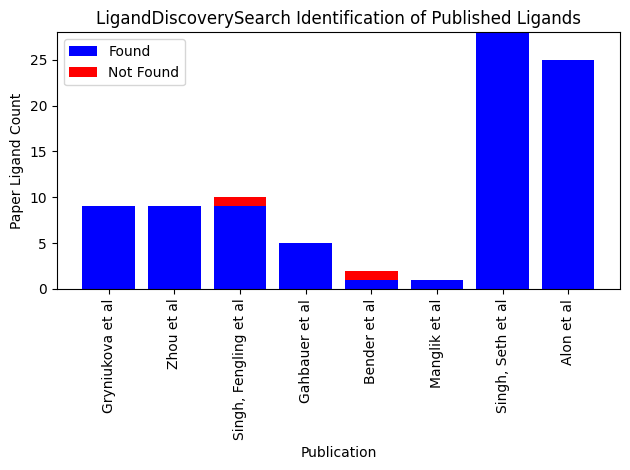

In [55]:
#stacked bar plot to show the number of ligands that would be/would not be identified from each publication
# Plot
fig, ax = plt.subplots()

# Plot the "found" bars in blue
ax.bar(main_df.index, main_df['found'], color='blue', label='Found')

# Plot the "not_found" bars in red, stacking them on top of "found"
ax.bar(main_df.index, main_df['not_found'], bottom=main_df['found'], color='red', label='Not Found')

# Add labels and legend
ax.set_ylabel('Paper Ligand Count')
ax.set_xlabel('Publication')
ax.set_title('LigandDiscoverySearch Identification of Published Ligands')
ax.legend()

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [56]:
#normalize all values to percentages
print(main_df)

                       found  not_found
Gryniukova et al           9          0
Zhou et al                 9          0
Singh, Fengling et al      9          1
Gahbauer et al             5          0
Bender et al               1          1
Manglik et al              1          0
Singh, Seth et al         28          0
Alon et al                25          0


In [57]:
# Calculate the row sum
main_df['row_sum'] = main_df['found'] + main_df['not_found']

# Filter out rows with a sum of zero
main_df = main_df[main_df['row_sum'] != 0]

# Normalize the 'found' and 'not_found' columns into new columns
main_df['found_normalized'] = main_df['found'] / main_df['row_sum']
main_df['not_found_normalized'] = main_df['not_found'] / main_df['row_sum']

# Drop the 'row_sum' column if not needed
main_df = main_df.drop(columns=['row_sum'])

print(main_df)

                       found  not_found  found_normalized  \
Gryniukova et al           9          0               1.0   
Zhou et al                 9          0               1.0   
Singh, Fengling et al      9          1               0.9   
Gahbauer et al             5          0               1.0   
Bender et al               1          1               0.5   
Manglik et al              1          0               1.0   
Singh, Seth et al         28          0               1.0   
Alon et al                25          0               1.0   

                       not_found_normalized  
Gryniukova et al                        0.0  
Zhou et al                              0.0  
Singh, Fengling et al                   0.1  
Gahbauer et al                          0.0  
Bender et al                            0.5  
Manglik et al                           0.0  
Singh, Seth et al                       0.0  
Alon et al                              0.0  


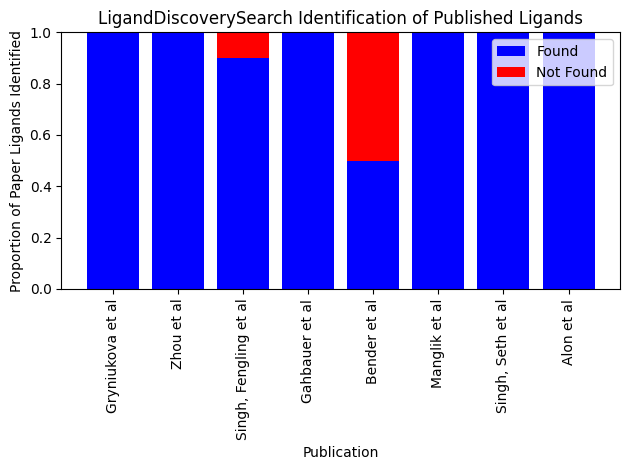

In [58]:
#stacked bar plot to show the number of ligands that would be/would not be identified from each publication
# Plot
fig, ax = plt.subplots()

# Plot the "found" bars in blue
ax.bar(main_df.index, main_df['found_normalized'], color='blue', label='Found')

# Plot the "not_found" bars in red, stacking them on top of "found"
ax.bar(main_df.index, main_df['not_found_normalized'], bottom=main_df['found_normalized'], color='red', label='Not Found')

# Add labels and legend
ax.set_ylabel('Proportion of Paper Ligands Identified')
ax.set_xlabel('Publication')
ax.set_title('LigandDiscoverySearch Identification of Published Ligands')
ax.legend()

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()